In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.manifold import MDS, Isomap, LocallyLinearEmbedding, TSNE

In [70]:
#Exo B
#Question 1
iris = pd.read_csv('iris.csv')
print(iris)

     SepalLength  SepalWidth  PetalLength  PetalWidth      Class
0            5.1         3.5          1.4         0.2     setosa
1            4.9         3.0          1.4         0.2     setosa
2            4.7         3.2          1.3         0.2     setosa
3            4.6         3.1          1.5         0.2     setosa
4            5.0         3.6          1.4         0.2     setosa
..           ...         ...          ...         ...        ...
145          6.7         3.0          5.2         2.3  virginica
146          6.3         2.5          5.0         1.9  virginica
147          6.5         3.0          5.2         2.0  virginica
148          6.2         3.4          5.4         2.3  virginica
149          5.9         3.0          5.1         1.8  virginica

[150 rows x 5 columns]


In [71]:
#Question 2
iris.columns.tolist()

['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Class']

In [73]:
#Question 3
iris_attributs = iris.columns.tolist()
iris_attributs1 = iris_attributs[0:4]
iris_class = iris['Class']
iris = iris.drop(columns=['Class'])

In [74]:
# Question 4
scaler = StandardScaler()
iris_scaler = scaler.fit_transform(iris[iris_attributs1])

In [75]:
#4 PCA code
pca = PCA(n_components=4)
#we initialiaze PCA to compute 4 components
iris_proj = pca.fit_transform(iris)
#we project the data on the 4 new components (but we will display only 2)
print(pca.explained_variance_ratio_)

[0.92461621 0.05301557 0.01718514 0.00518309]


In [76]:
def plotColorB(i):
    if iris_class[i] == 'setosa':
        return 'red'
    if iris_class[i] == 'versicolor':
        return 'green'
    if iris_class[i] == 'virginica':
        return 'blue'

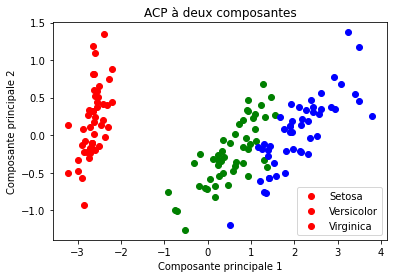

In [77]:
for i in range(150):
    plt.scatter(iris_proj[i][0], iris_proj[i][1], color=plotColorB(i))
plt.xlabel('Composante principale 1')
plt.ylabel('Composante principale 2')
plt.title('ACP à deux composantes')
plt.legend(['Setosa', 'Versicolor', 'Virginica'])
plt.show()

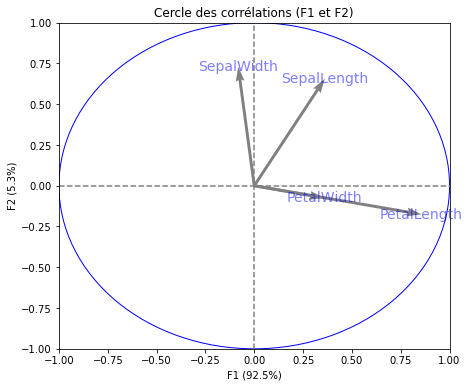

In [78]:
#Question 5
pcs = pca.components_

def display_circles(pcs, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None):
    for d1, d2 in axis_ranks:  # On affiche les 3 premiers plans factoriels, donc les 6 premières composantes
        if d2 < n_comp:

            #Initialisation de la figure
            fig, ax = plt.subplots(figsize=(7, 6))

            #Détermination des limites du graphique
            if lims is not None:
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 30:
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else:
                xmin, xmax, ymin, ymax = min(pcs[d1, :]), max(pcs[d1, :]), min(pcs[d2, :]), max(pcs[d2, :])

            #Affichage des flèches
            #S'il y a plus de 30 flèches, on n'affiche pas le triangle à leur extrémité
            if pcs.shape[1] < 30:
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                           pcs[d1, :], pcs[d2, :],
                           angles='xy', scale_units='xy', scale=1, color="grey")
                #(voir la doc : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.quiver.html)
            else:
                lines = [[[0, 0], [x, y]] for x, y in pcs[[d1, d2]].T]
                ax.add_collection(LineCollection(lines, axes=ax, alpha=.1, color='black'))

            #Affichage des noms des variables
            if labels is not None:
                for i, (x, y) in enumerate(pcs[[d1, d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax:
                        plt.text(x, y, labels[i], fontsize='14', ha='center', va='center', rotation=label_rotation,
                                 color="blue", alpha=0.5)

            #Affichage du cercle
            circle = plt.Circle((0, 0), 1, facecolor='none', edgecolor='b')
            plt.gca().add_artist(circle)

            #Définition des limites du graphique
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)

            #Affichage des lignes horizontales et verticales
            plt.plot([-1, 1], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')

            #Nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1 + 1, round(100 * pca.explained_variance_ratio_[d1], 1)))
            plt.ylabel('F{} ({}%)'.format(d2 + 1, round(100 * pca.explained_variance_ratio_[d2], 1)))

            plt.title("Cercle des corrélations (F{} et F{})".format(d1 + 1, d2 + 1))
            plt.show()


display_circles(pcs, 2, pca, [(0, 1), (2, 3), (4, 5)], labels=np.array(iris.columns.tolist()))


In [79]:
#Exo C
#Question 1
digits = pd.read_csv("digits.csv", sep=",", header=None)
column = digits[64]
digits = digits.drop(columns=[64])

In [80]:
#Question 2
digits_attributs = digits.columns.tolist()
scaler = StandardScaler()
digits_scaler = scaler.fit_transform(digits[digits_attributs])
pca = PCA(n_components=2)
digits_proj = pca.fit_transform(digits_scaler)
print(pca.explained_variance_ratio_)

[0.12033916 0.09561054]


In [81]:
def plotColorC(i):
    if column[i] == 0:
        return 'black'
    if column[i] == 1:
        return 'red'
    if column[i] == 2:
        return 'blue'
    if column[i] == 3:
        return 'green'
    if column[i] == 4:
        return 'yellow'
    if column[i] == 5:
        return 'orange'
    if column[i] == 6:
        return 'pink'
    if column[i] == 7:
        return 'gray'
    if column[i] == 8:
        return 'purple'
    if column[i] == 9:
        return 'chocolate'

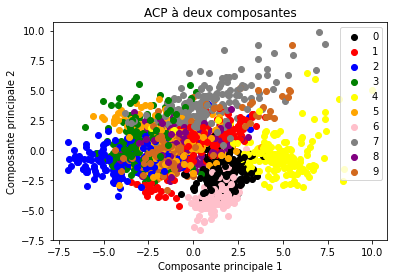

In [82]:
for i in range(1797):
    plt.scatter(digits_proj[i][0], digits_proj[i][1], color=plotColorC(i))
plt.xlabel('Composante principale 1')
plt.ylabel('Composante principale 2')
plt.title('ACP à deux composantes')
plt.legend(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])
plt.show()

In [83]:
#Question 3
perplexite = 100
tsne = TSNE(n_components=2, perplexity=perplexite).fit_transform(digits_scaler)

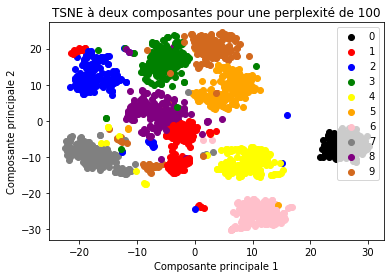

In [84]:
for i in range(1797):
    plt.scatter(tsne[i][0], tsne[i][1], color=plotColorC(i))
plt.xlabel('Composante principale 1')
plt.ylabel('Composante principale 2')
plt.title('TSNE à deux composantes pour une perplexité de ' + str(perplexite))
plt.legend(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])
plt.show()

In [85]:
#Exo D
#Question 1
gdata = pd.read_csv('golub_data.csv', sep=",")
gdata_transpose = np.transpose(gdata)
scaler = StandardScaler()
data = scaler.fit_transform(gdata_transpose)

In [86]:
#Question 2
gclass = pd.read_csv('golub_class2.csv', sep=",", header=None)

In [87]:
pca = PCA(n_components=2)
data_proj = pca.fit_transform(data)

In [88]:
def defColor(i):
    if gclass[1][i] == 'ALL':
        return 'red'
    if gclass[1][i] == 'AML':
        return 'green'

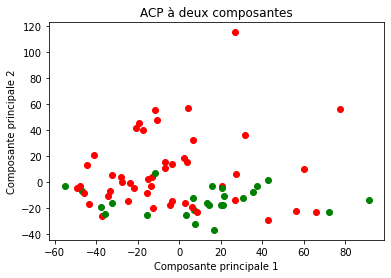

In [89]:
for i in range(72):
    plt.scatter(data_proj[i][0], data_proj[i][1], color=defColor(i))
plt.xlabel('Composante principale 1')
plt.ylabel('Composante principale 2')
plt.title('ACP à deux composantes')
plt.show()

In [90]:
#Question 4
MDS = MDS(n_components=2, random_state=0)
data_proj_MDS = MDS.fit_transform(data)

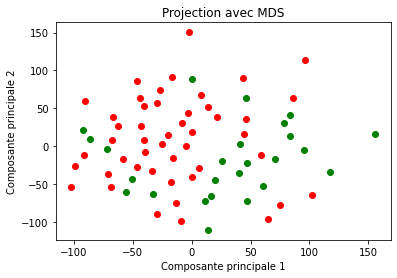

In [91]:
for i in range(72):
     plt.scatter(data_proj_MDS[i][0], data_proj_MDS[i][1], color=defColor(i))
plt.title('Projection avec MDS')
plt.xlabel('Composante principale 1')
plt.ylabel('Composante principale 2')
plt.show()

In [92]:
#Question 5

isomap4 = Isomap(n_neighbors=4)
isomap8 = Isomap(n_neighbors=8)
isomap10 = Isomap(n_neighbors=10)
isomap13 = Isomap(n_neighbors=13)
isomap16 = Isomap(n_neighbors=16)
isomap20 = Isomap(n_neighbors=20)

data_proj_isomap4 = isomap4.fit_transform(data)
data_proj_isomap8 = isomap8.fit_transform(data)
data_proj_isomap10 = isomap10.fit_transform(data)
data_proj_isomap13 = isomap13.fit_transform(data)
data_proj_isomap16 = isomap16.fit_transform(data)
data_proj_isomap20 = isomap20.fit_transform(data)

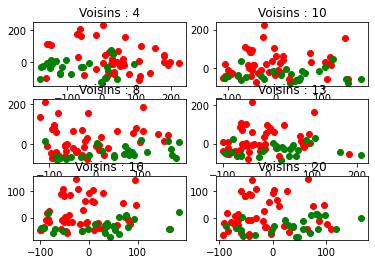

In [93]:
fig, axs = plt.subplots(3, 2)

for i in range(72):
    axs[0][0].scatter(data_proj_isomap4[i][0], data_proj_isomap4[i][1], color=defColor(i))
    axs[0][0].set_title('Voisins : 4')
    axs[1][0].scatter(data_proj_isomap8[i][0], data_proj_isomap8[i][1], color=defColor(i))
    axs[1][0].set_title('Voisins : 8')
    axs[0][1].scatter(data_proj_isomap10[i][0], data_proj_isomap10[i][1], color=defColor(i))
    axs[0][1].set_title('Voisins : 10')
    axs[1][1].scatter(data_proj_isomap13[i][0], data_proj_isomap13[i][1], color=defColor(i))
    axs[1][1].set_title('Voisins : 13')
    axs[2][0].scatter(data_proj_isomap16[i][0], data_proj_isomap16[i][1], color=defColor(i))
    axs[2][0].set_title('Voisins : 16')
    axs[2][1].scatter(data_proj_isomap20[i][0], data_proj_isomap20[i][1], color=defColor(i))
    axs[2][1].set_title('Voisins : 20')
plt.show()

In [94]:
#Question 6

LLE_3 = LocallyLinearEmbedding(n_neighbors=3)
LLE_5 = LocallyLinearEmbedding(n_neighbors=5)
LLE_8 = LocallyLinearEmbedding(n_neighbors=8)
LLE_10 = LocallyLinearEmbedding(n_neighbors=10)
LLE_12 = LocallyLinearEmbedding(n_neighbors=12)
LLE_15 = LocallyLinearEmbedding(n_neighbors=71)

data_proj_LLE3 = LLE_3.fit_transform(data)
data_proj_LLE5 = LLE_5.fit_transform(data)
data_proj_LLE8 = LLE_8.fit_transform(data)
data_proj_LLE10 = LLE_10.fit_transform(data)
data_proj_LLE12 = LLE_12.fit_transform(data)
data_proj_LLE15 = LLE_15.fit_transform(data)

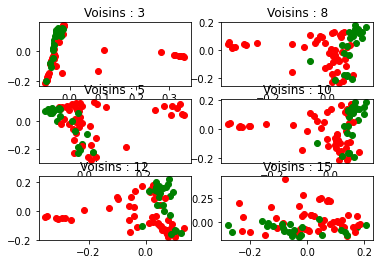

In [95]:
figLLE, axsLLE = plt.subplots(3, 2)
for i in range(72):
    axsLLE[0][0].scatter(data_proj_LLE3[i][0], data_proj_LLE3[i][1], color=defColor(i))
    axsLLE[0][0].set_title('Voisins : 3')
    axsLLE[1][0].scatter(data_proj_LLE5[i][0], data_proj_LLE5[i][1], color=defColor(i))
    axsLLE[1][0].set_title('Voisins : 5')
    axsLLE[0][1].scatter(data_proj_LLE8[i][0], data_proj_LLE8[i][1], color=defColor(i))
    axsLLE[0][1].set_title('Voisins : 8')
    axsLLE[1][1].scatter(data_proj_LLE10[i][0], data_proj_LLE10[i][1], color=defColor(i))
    axsLLE[1][1].set_title('Voisins : 10')
    axsLLE[2][0].scatter(data_proj_LLE12[i][0], data_proj_LLE12[i][1], color=defColor(i))
    axsLLE[2][0].set_title('Voisins : 12')
    axsLLE[2][1].scatter(data_proj_LLE15[i][0], data_proj_LLE15[i][1], color=defColor(i))
    axsLLE[2][1].set_title('Voisins : 15')
plt.show()

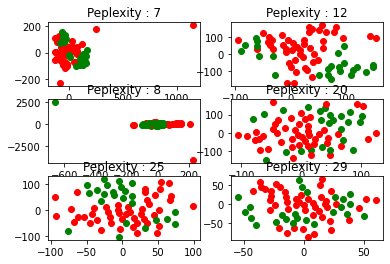

In [96]:
#Question 7
TSNE_7 = TSNE(perplexity = 7)
TSNE_8 = TSNE(perplexity = 8)
TSNE_12 = TSNE(perplexity = 12)
TSNE_20 = TSNE(perplexity= 20)
TSNE_25 = TSNE(perplexity = 25)
TSNE_29 = TSNE(perplexity = 29)

data_proj_TSNE_7 = TSNE_7.fit_transform(data)
data_proj_TSNE_8 = TSNE_8.fit_transform(data)
data_proj_TSNE_12 = TSNE_12.fit_transform(data)
data_proj_TSNE_20 = TSNE_20.fit_transform(data)
data_proj_TSNE_25 = TSNE_25.fit_transform(data)
data_proj_TSNE_29 = TSNE_29.fit_transform(data)
figLLE, axsLLE = plt.subplots(3, 2)

for i in range(71):
    axsLLE[0][0].scatter(data_proj_TSNE_7[i][0], data_proj_TSNE_7[i][1], color=defColor(i))
    axsLLE[0][0].set_title('Peplexity : 7')
    axsLLE[1][0].scatter(data_proj_TSNE_8[i][0], data_proj_TSNE_8[i][1], color=defColor(i))
    axsLLE[1][0].set_title('Peplexity : 8')
    axsLLE[0][1].scatter(data_proj_TSNE_12[i][0], data_proj_TSNE_12[i][1], color=defColor(i))
    axsLLE[0][1].set_title('Peplexity : 12')
    axsLLE[1][1].scatter(data_proj_TSNE_20[i][0], data_proj_TSNE_20[i][1], color=defColor(i))
    axsLLE[1][1].set_title('Peplexity : 20')
    axsLLE[2][0].scatter(data_proj_TSNE_25[i][0], data_proj_TSNE_25[i][1], color=defColor(i))
    axsLLE[2][0].set_title('Peplexity : 25')
    axsLLE[2][1].scatter(data_proj_TSNE_29[i][0], data_proj_TSNE_29[i][1], color=defColor(i))
    axsLLE[2][1].set_title('Peplexity : 29')
plt.show()